# Do Rainy Months Increase Public Concern About Dengue and Malaria?

In this notebook, we explore the relationship between **total precipitation in India** and public awareness of **dengue** and **malaria** from 2004 to 2024.

We use **`varunayan`** to extract processed precipitation data for India's region at monthly frequency.

By combining this climate data with **Google Trends** search activity, we investigate how rainfall patterns relate to public awareness of mosquito-borne diseases — and whether increased precipitation precedes spikes in concern.

## Downloading Total Precipitation Data

We use `varunayan.era5ify_geojson` to retrieve **monthly total precipitation** over India using a GeoJSON boundary and the ERA5 dataset.


In [5]:
import varunayan

df = varunayan.era5ify_geojson(
    request_id="prec_india_2004_2024",
    variables=["total_precipitation"],
    start_date="2004-1-1",
    end_date="2024-12-31",
    json_file="https://gist.githubusercontent.com/JaggeryArray/bf296307132e7d6127e28864c7bea5bf/raw/4bce03beea35d61a93007f54e52ba81f575a7feb/india.json",
    frequency="monthly"
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: prec_india_2004_2024
Variables: ['total_precipitation']
Date Range: 2004-01-01 to 2024-12-31
Frequency: monthly
Resolution: 0.25°
GeoJSON File: C:\Users\ATHARV~1\AppData\Local\Temp\prec_india_2004_2024_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (68.18°W to 97.40°E, 7.97°S to 35.49°N):
┌─────────────────────────────────────────┐
│·········································│
│········■■■■■■■··························│
│··········■■■■■··························│
│·········■■■■■■■·························│
│·······■■■■■■■■■■························│
│····■■■■■■■■■■■■■■■■········■····■■■■■■■·│
│···■■■■■■■■■■■■■■■■■■■■■■■■■·■■■■■■■■····│
│····■■■■■■■■■■■■■■■■■■■■■■■■·····■■■■····│
│·■■■■■■■■■■■■■■■■■■■■■■■■■■■■···■■■······│
│··■■■■■■■■■■■■■■■■■■■■■■■■■■■············│
│·······■■■■■■■■■■■■■■■■■■■···············│
│·······■■■■■■■■■■■■■■■■··················│
│·······■■■■■■■■■■■■■·····················│
│········■■■■■■■■■·················

8f42c860d5f7951252fbd88fa1fa8a94.zip:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

2f81a0902ab87f6ad08e09931009ad44.zip:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

c8b1b65a7a680a466ccc28375f743bf2.zip:   0%|          | 0.00/1.41M [00:00<?, ?B/s]


Saving files to output directory: prec_india_2004_2024_output
  Saved final data to: prec_india_2004_2024_output\prec_india_2004_2024_monthly_data.csv
  Saved unique coordinates to: prec_india_2004_2024_output\prec_india_2004_2024_unique_latlongs.csv
  Saved raw data to: prec_india_2004_2024_output\prec_india_2004_2024_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         2004-01-01 to 2024-12-31
Final output shape:  (252, 3)
Total complete processing time: 94.03 seconds

First 5 rows of aggregated data:
         tp  year  month
0  0.029095  2004      1
1  0.010954  2004      2
2  0.024185  2004      3
3  0.062215  2004      4
4  0.082469  2004      5

ERA5 SINGLE LEVEL PROCESSING COMPLETED SUCCESSFULLY


## Merging Precipitation and Google Trends Data

- Convert precipitation from meters to millimeters
- Parse monthly dates
- Load Google Trends data for `dengue symptoms` and `malaria symptoms`
- Merge the datasets by date for joint analysis


In [6]:
import pandas as pd

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['tp'] = df['tp']*1000

In [12]:
df_dengue = pd.read_csv('https://gist.githubusercontent.com/JaggeryArray/fcc204d10f0b7acdd4813f1581ab18ef/raw/3589dea8be071f545b94f236db1b52f2efd11723/multiTimeline_india_googletrends_dengue_symptoms_2004-now.csv')
df_malaria = pd.read_csv('https://gist.githubusercontent.com/JaggeryArray/5635a5654a0264d71b031fdd073cbf83/raw/8f8c760840507583d1b72a846ed76e3cdbc697ee/multiTimeline_india_googletrends_malaria_symptoms_2004-now.csv')

In [13]:
df_malaria['date'] = pd.to_datetime(df_malaria['Month'], format='%Y-%m')
df_dengue['date'] = pd.to_datetime(df_dengue['Month'], format='%Y-%m')

df_dengue_merged = pd.merge(df, df_dengue, on='date', how='inner')
df_malaria_merged = pd.merge(df, df_malaria, on='date', how='inner')

In [14]:
def setup_matplotlib():
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError(
            "Matplotlib is not installed. Install it with: pip install matplotlib"
        )

    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.labelweight"] = "normal"

    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = "Arial"
    plt.rcParams["mathtext.it"] = "Arial:italic"
    plt.rcParams["mathtext.bf"] = "Arial:bold"

## Visualizing Precipitation vs Search Interest in Dengue Symptoms

This plot compares **monthly rainfall** and **Google search interest in "dengue symptoms"**, using log-scaling to smooth trend fluctuations.

The goal is to visually inspect if increases in rainfall correspond with spikes in public concern.


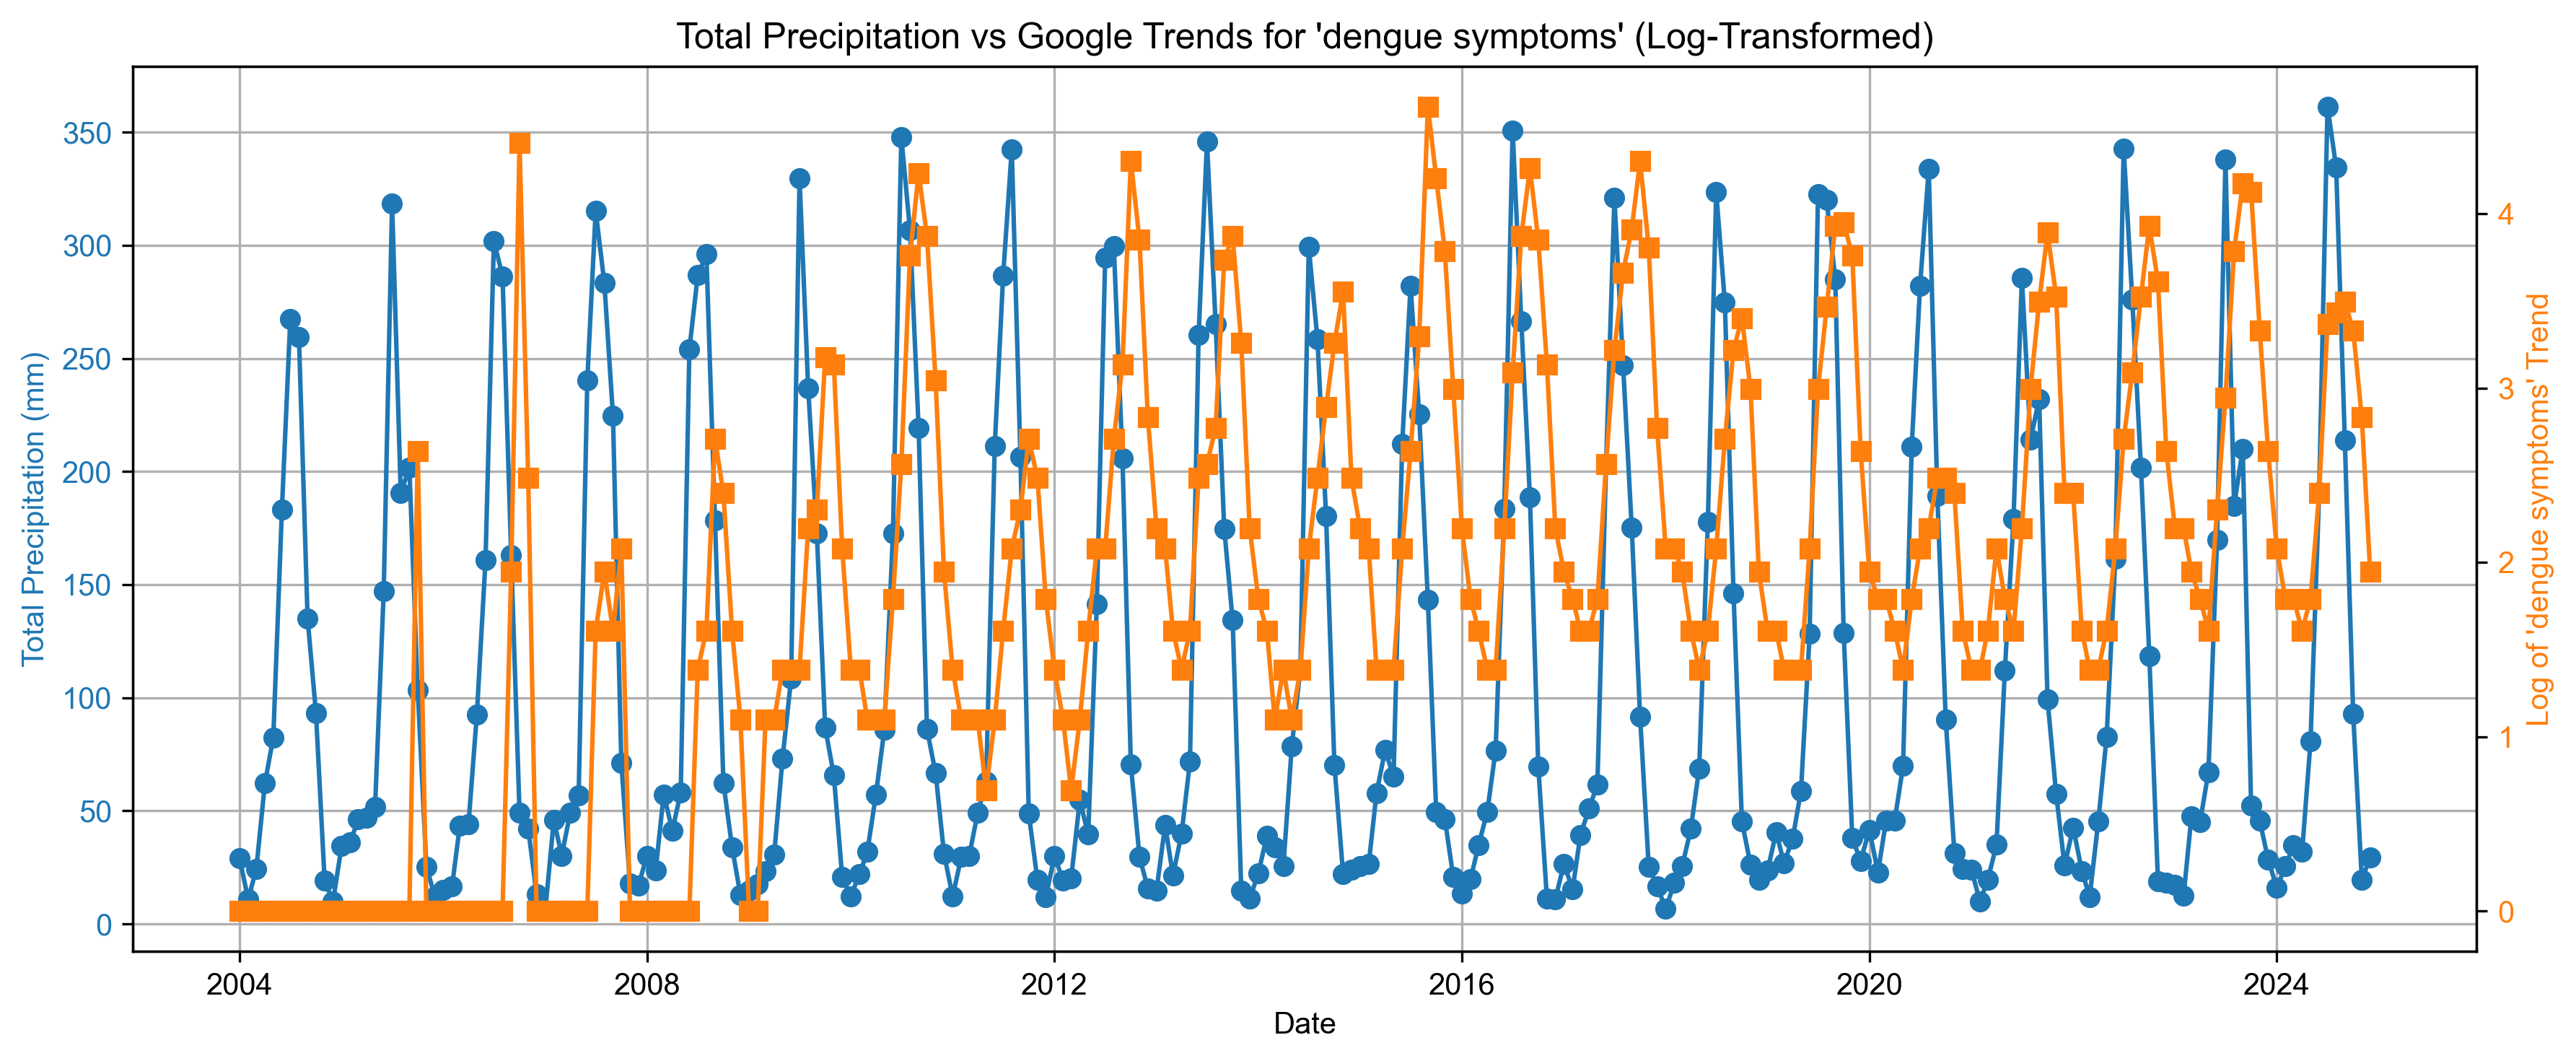

In [15]:
import numpy as np
import matplotlib.pyplot as plt

setup_matplotlib()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot tp on left y-axis
ax1.plot(df_dengue_merged['date'], df_dengue_merged['tp'], color='tab:blue', marker='o', label='Total Precipitation (tp)')
ax1.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Apply log transform to dengue column
dengue_log = np.log(df_dengue_merged['dengue symptoms'] + 1)  # Add 1 to avoid log(0)

# Plot on right y-axis
ax2 = ax1.twinx()
ax2.plot(df_dengue_merged['date'], dengue_log, color='tab:orange', marker='s', label='searches for \'dengue symptoms\' (log-scaled)')
ax2.set_ylabel('Log of \'dengue symptoms\' Trend', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('Total Precipitation vs Google Trends for \'dengue symptoms\' (Log-Transformed)')
ax1.set_xlabel('Date')
ax1.grid(True)
fig.tight_layout()

plt.show()


> There appears to be a pattern where **search interest in dengue symptoms rises after peak rainfall months**, which aligns with known transmission cycles for mosquito-borne diseases.

## Visualizing Precipitation vs Search Interest in Malaria Symptoms

We repeat the same visualization approach for **malaria symptoms** to examine whether precipitation patterns precede or coincide with rising public awareness of malaria risk.


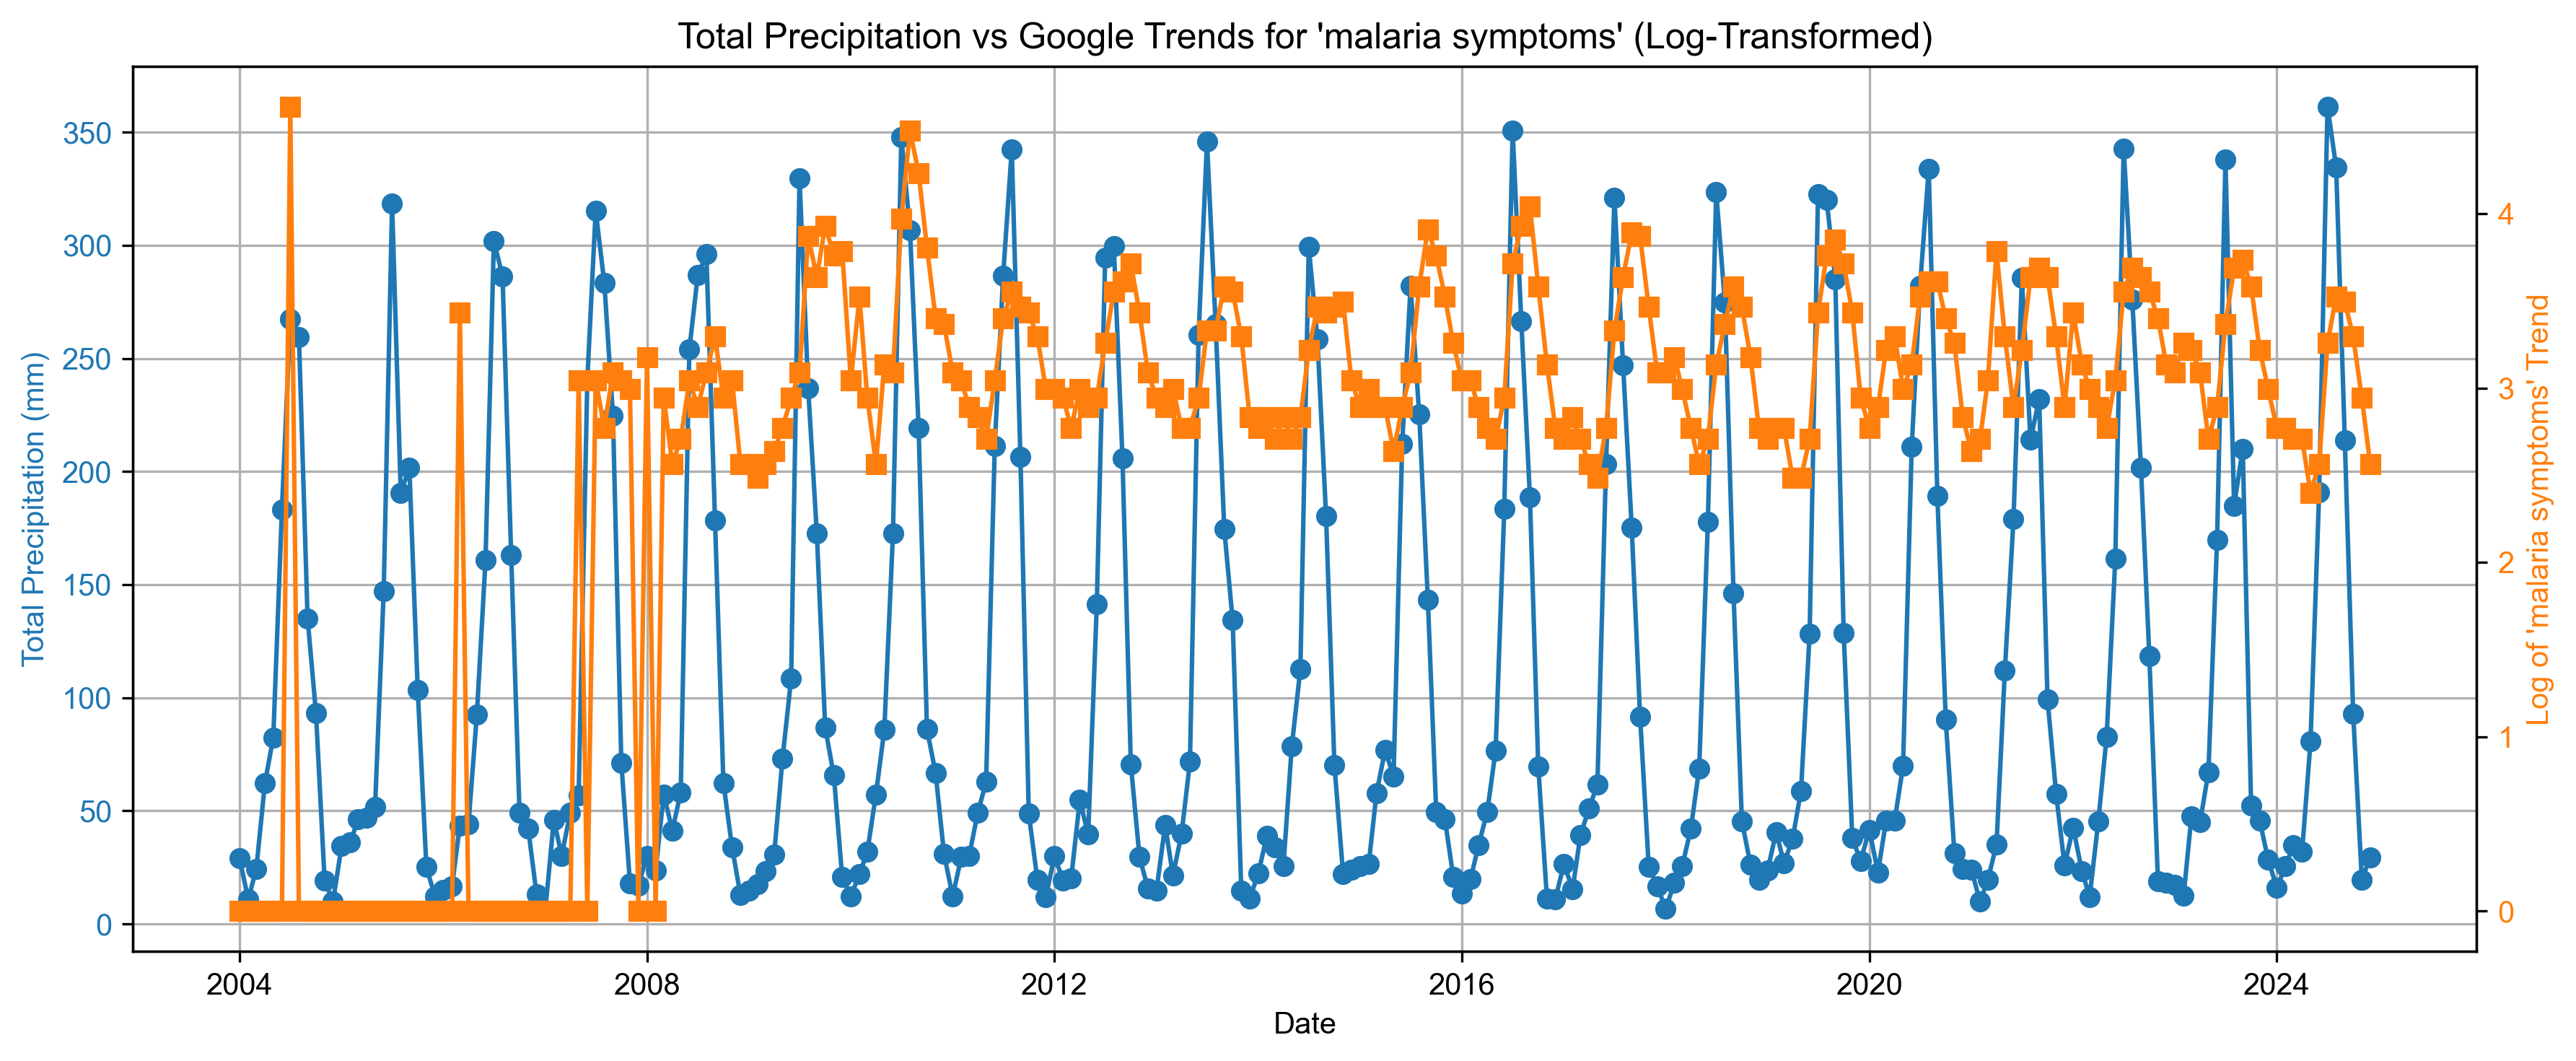

In [16]:
import numpy as np
import matplotlib.pyplot as plt

setup_matplotlib()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot tp on left y-axis
ax1.plot(df_malaria_merged['date'], df_malaria_merged['tp'], color='tab:blue', marker='o', label='Total Precipitation (tp)')
ax1.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Apply log transform to malaria column
malaria_log = np.log(df_malaria_merged['malaria symptoms'] + 1)  # Add 1 to avoid log(0)

# Plot on right y-axis
ax2 = ax1.twinx()
ax2.plot(df_malaria_merged['date'], malaria_log, color='tab:orange', marker='s', label='searches for \'malaria symptoms\' (log-scaled)')
ax2.set_ylabel('Log of \'malaria symptoms\' Trend', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('Total Precipitation vs Google Trends for \'malaria symptoms\' (Log-Transformed)')
ax1.set_xlabel('Date')
ax1.grid(True)
fig.tight_layout()

plt.show()


> As with dengue, **malaria-related search interest often increases shortly after heavy rainfall**, suggesting a seasonal awareness cycle.

## Cross-Correlation: Dengue Symptoms vs Precipitation

We use cross-correlation to check if **dengue interest lags or leads precipitation**.  
A **positive lag** means rainfall leads search interest.  
This helps assess whether people become concerned *after* rainy periods.


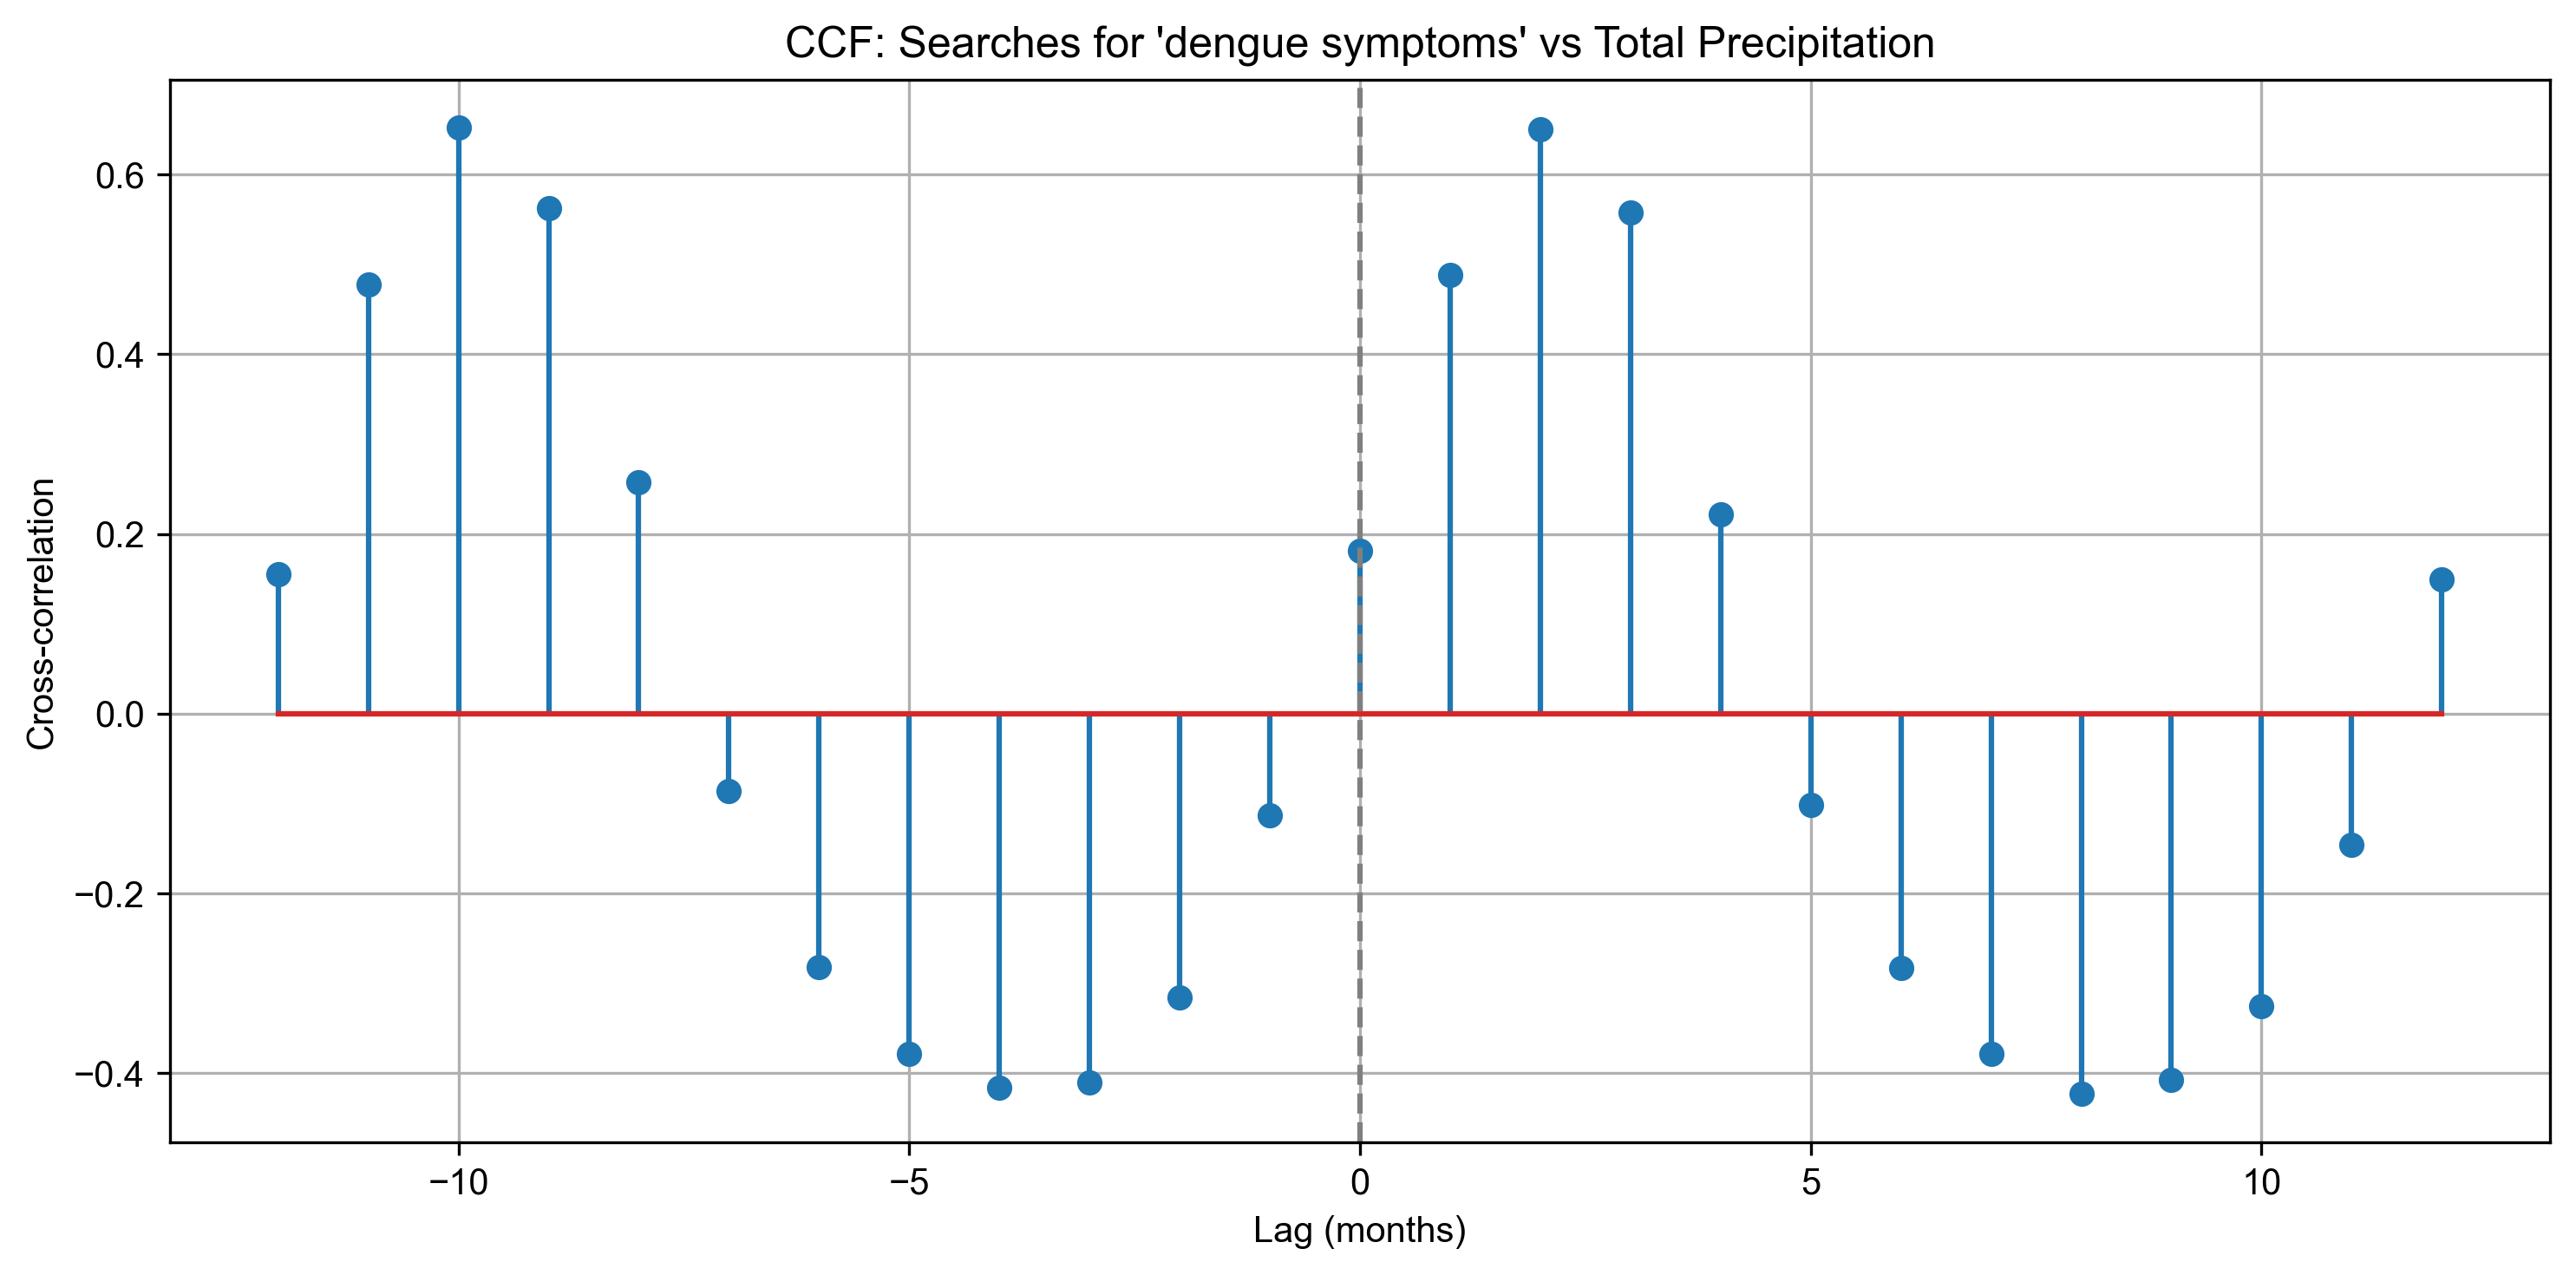

In [19]:
import numpy as np

tp = (df_dengue_merged['tp'] - df_dengue_merged['tp'].mean()) / df_dengue_merged['tp'].std()
dengue = (df_dengue_merged['dengue symptoms'] - df_dengue_merged['dengue symptoms'].mean()) / df_dengue_merged['dengue symptoms'].std()

# Full cross-correlation
corr = np.correlate(dengue - dengue.mean(), tp - tp.mean(), mode='full')
lags = np.arange(-len(dengue)+1, len(dengue))
corr = corr / (len(dengue) * dengue.std() * tp.std())  # Normalize

lag_limit = 12
mask = (lags >= -lag_limit) & (lags <= lag_limit)
lags_limited = lags[mask]
corr_limited = corr[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.stem(lags_limited, corr_limited)
plt.xlabel('Lag (months)')
plt.ylabel('Cross-correlation')
plt.title('CCF: Searches for \'dengue symptoms\' vs Total Precipitation')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


> The CCF plot shows that **search interest in dengue symptoms tends to follow rainfall by 2 months**, indicating that public awareness spikes **after breeding conditions increase**.

## Cross-Correlation: Malaria Symptoms vs Precipitation

We repeat the same analysis for malaria, testing how far search trends lag or lead relative to precipitation.


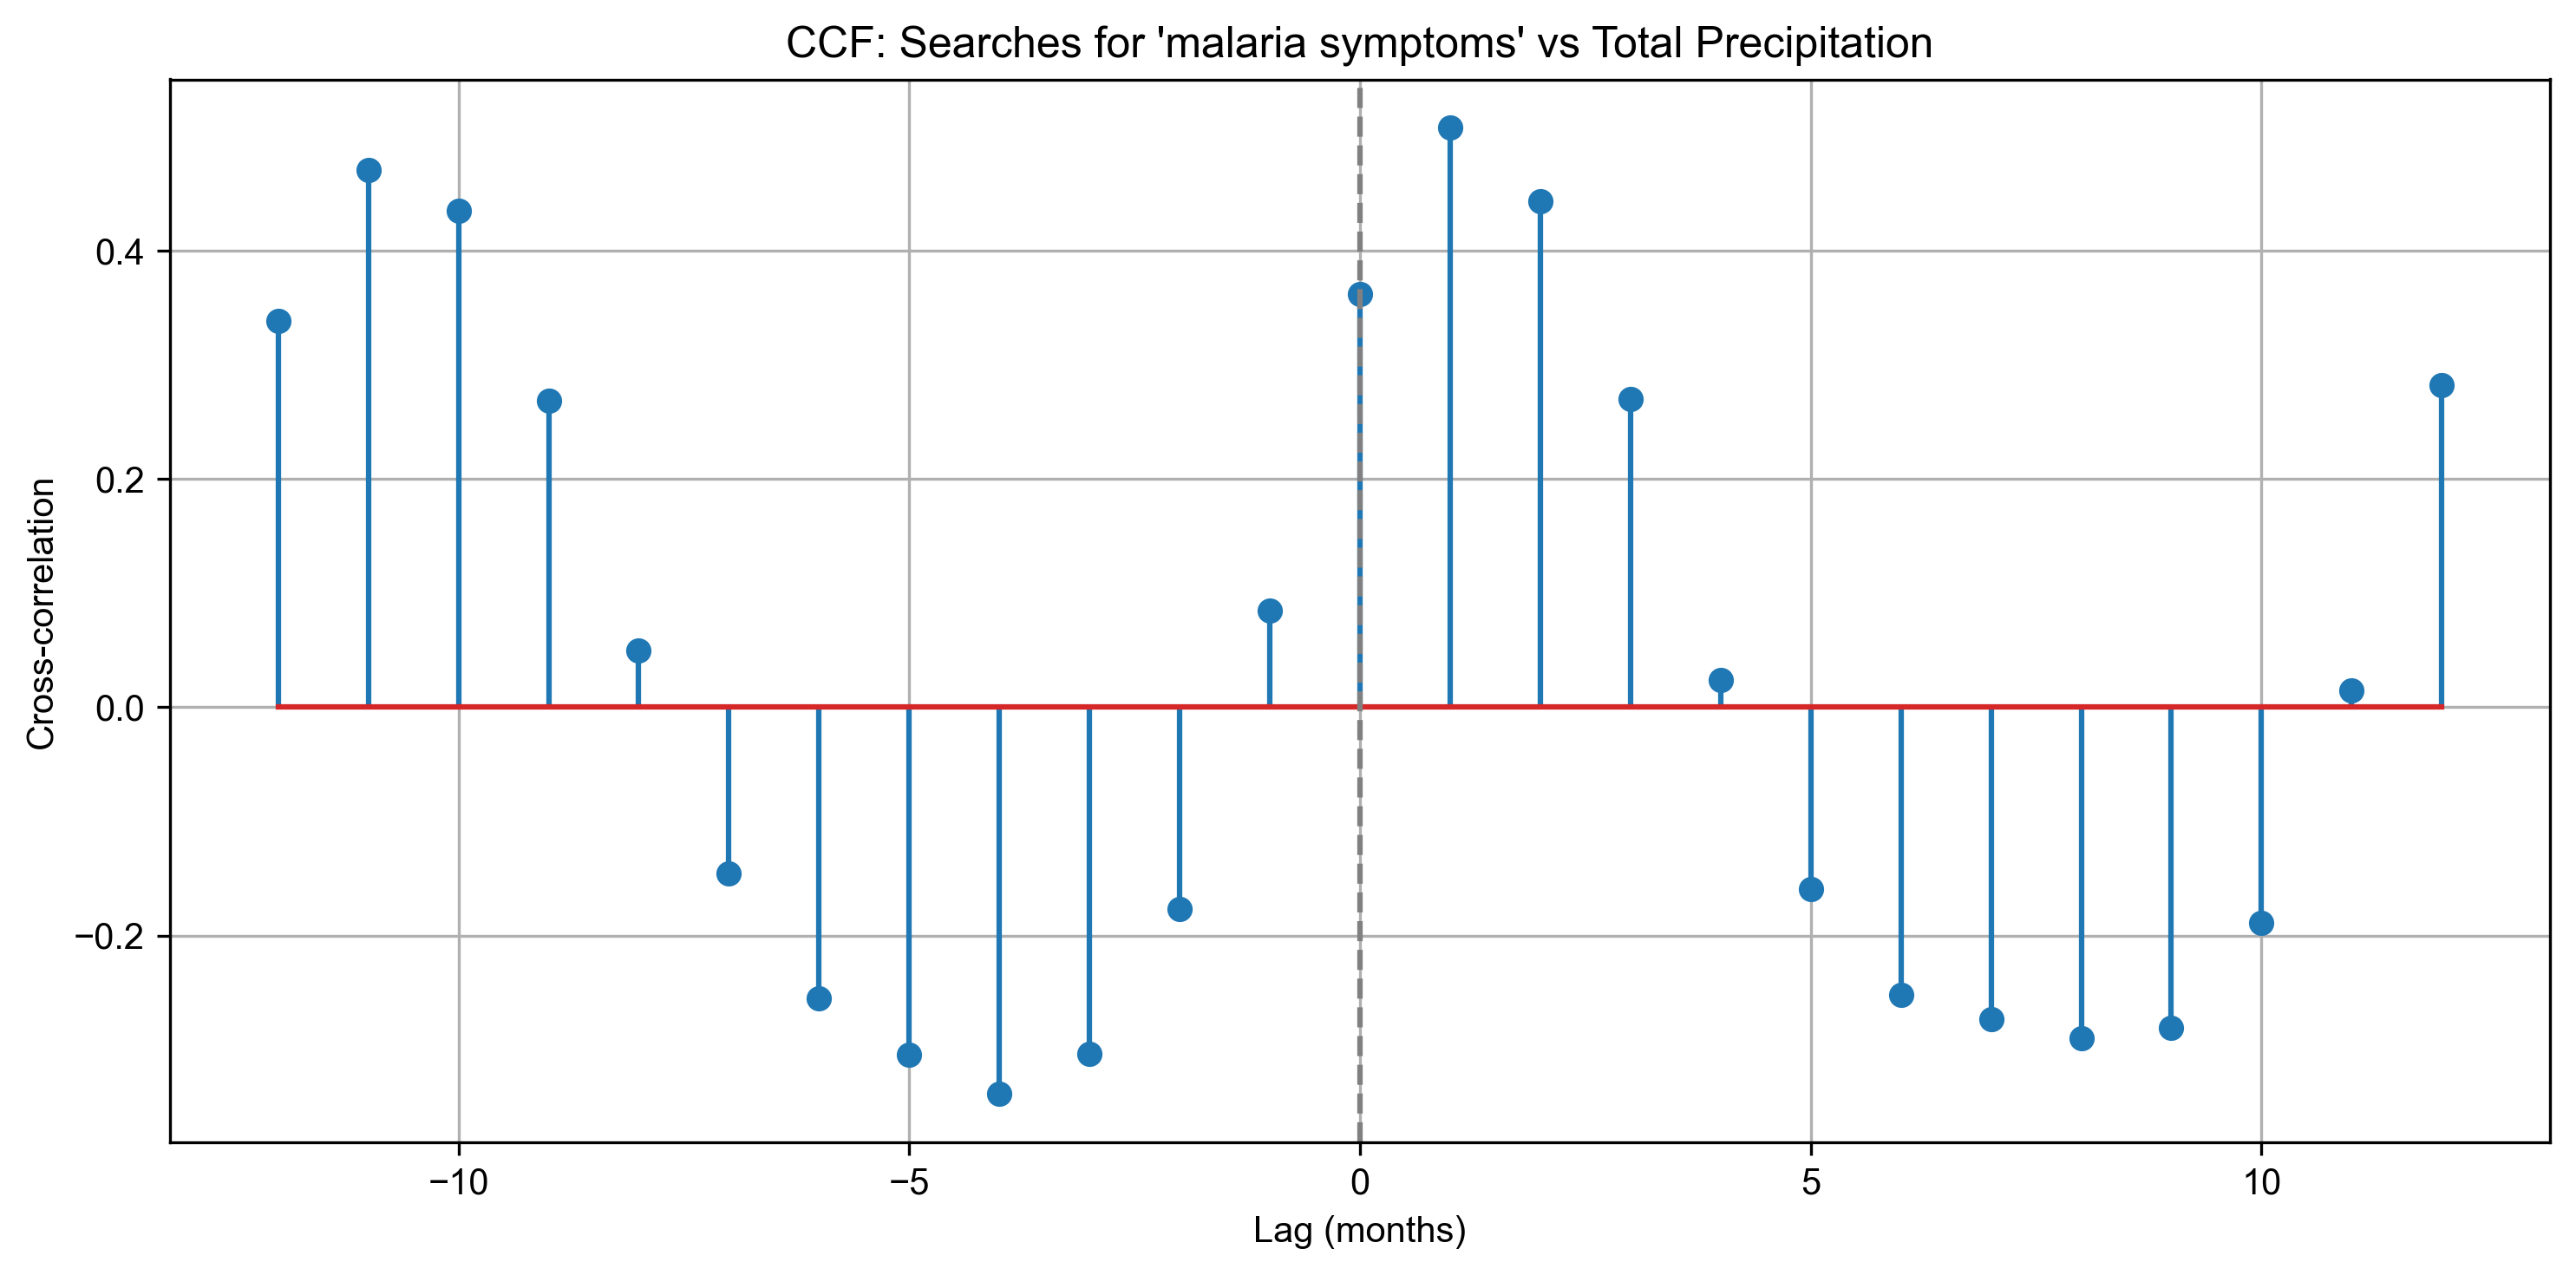

In [20]:
import numpy as np

tp = (df_malaria_merged['tp'] - df_malaria_merged['tp'].mean()) / df_malaria_merged['tp'].std()
malaria = (df_malaria_merged['malaria symptoms'] - df_malaria_merged['malaria symptoms'].mean()) / df_malaria_merged['malaria symptoms'].std()

# Full cross-correlation
corr = np.correlate(malaria - malaria.mean(), tp - tp.mean(), mode='full')
lags = np.arange(-len(malaria)+1, len(malaria))
corr = corr / (len(malaria) * malaria.std() * tp.std())  # Normalize

lag_limit = 12
mask = (lags >= -lag_limit) & (lags <= lag_limit)
lags_limited = lags[mask]
corr_limited = corr[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.stem(lags_limited, corr_limited)
plt.xlabel('Lag (months)')
plt.ylabel('Cross-correlation')
plt.title('CCF: Searches for \'malaria symptoms\' vs Total Precipitation')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


> Similar to dengue, **malaria search trends lag behind rainfall, (1 month to be exact)**, suggesting that increased rainfall is followed by heightened public awareness.

## Conclusion

This analysis demonstrates that **total precipitation in India is positively correlated with public search interest in mosquito-borne diseases** like **dengue** and **malaria**.

- Peak rainfall often precedes rising public concern by **1–2 months**
- Cross-correlation confirms a **lagging relationship**, which aligns with seasonal mosquito activity and disease outbreaks

By combining **climate data extracted using `varunayan`** with **search behavior**, we can understand the **environmentally driven public health patterns**.
